# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

#### Matheus de Deus Lima
##### RM95021


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.datasets import make_regression


In [21]:
df = pd.read_csv('carros.csv')
df = df.dropna()
df

,Brand,Price,Body,Mileage/1000,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


### Respostas 1

###### Todos os dados: 39.105 
###### Quantidade de atributos: 9 
###### Tipos de dados: float, int, string. 
###### Existem sim dados faltantes.

#### 2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [22]:
df['Mileage/1000'] = df['Mileage/1000'] * 1600

df = df.rename(
        columns=({'Brand': 'Marca', 'Price': 'Preço', 'Body': 'Lataria', 
                  'EngineV': 'Cilindrada/1000', 'Engine Type': 'Combustível',
                  'Registration': 'Documentação', 'Year': 'Ano', 'Model': 'Modelo', 'Mileage/1000': 'Quilometragem'}))


df.head(5)

,Marca,Preço,Lataria,Quilometragem,Cilindrada/1000,Combustível,Documentação,Ano,Modelo
0,BMW,4200.0,sedan,443200,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,683200,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,572800,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,384000,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,192000,2.0,Petrol,yes,2011,Rav 4


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

In [23]:
df.describe()

,Preço,Quilometragem,Cilindrada/1000,Ano
count,4025.000000,4.025000e+03,4025.000000,4025.000000
mean,19552.308065,2.617155e+05,2.764586,2006.379627
std,25815.734988,1.654315e+05,4.935941,6.695595
min,600.000000,0.000000e+00,0.600000,1969.000000
25%,6999.000000,1.440000e+05,1.800000,2003.000000
50%,11500.000000,2.528000e+05,2.200000,2007.000000
75%,21900.000000,3.680000e+05,3.000000,2012.000000
max,300000.000000,1.568000e+06,99.990000,2016.000000


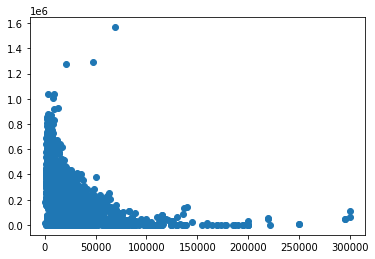

In [24]:
plt.scatter(x='Preço', y='Quilometragem',data=df)

Text(0, 0.5, 'Lataria')

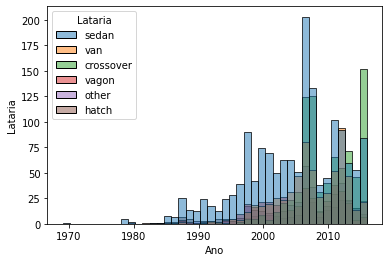

In [25]:
sns.histplot(df, x='Ano', hue='Lataria')
plt.ylabel('Lataria')

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)



#### Resposta 4: 
###### Modelo supervisionado porque temos os dados e iremos ensinar a maquina



5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

#### Resposta 5: 
###### Técnica de regressão porque a resposta é numérica

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

#### Resposta 5.1:
#### Algoritmo 1: Regressao Linear


#### Resposta 5.2: 
#### Algoritmo 2: LinearSVR

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [26]:
### Renomeando as tabelas e fazendo o get_dummies para a regressão

df.drop(['Documentação'], axis='columns', inplace=True)
df = pd.get_dummies(df, columns=['Marca','Lataria', 'Combustível'])
df = df.rename(
        columns=({'Combustível_Diesel': 'Diesel',
                  'Combustível_Gas': 'Gas', 'Combustível_Other': 'Outro', 'Combustível_Petrol': 'Gasolina'}))
df.columns

Index(['Preço', 'Quilometragem', 'Cilindrada/1000', 'Ano', 'Modelo',
       'Marca_Audi', 'Marca_BMW', 'Marca_Mercedes-Benz', 'Marca_Mitsubishi',
       'Marca_Renault', 'Marca_Toyota', 'Marca_Volkswagen',
       'Lataria_crossover', 'Lataria_hatch', 'Lataria_other', 'Lataria_sedan',
       'Lataria_vagon', 'Lataria_van', 'Diesel', 'Gas', 'Outro', 'Gasolina'],
      dtype='object')

In [27]:
#Sua resposta 

X = df[['Ano', 'Quilometragem', 'Cilindrada/1000', 'Lataria_sedan', 'Marca_Volkswagen']]
       
y = df[['Preço']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
linear = LinearRegression()

7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)

In [28]:
linear.fit(X_train,y_train) 
y_predicoes = linear.predict(X_test) 

In [29]:
#Sua resposta aqui

MAE_var = mean_absolute_error(y_true = y_test,      
                          y_pred = y_predicoes)
print(f'MAE: ', MAE_var.round(2)) 

R2_var = r2_score(y_true = y_test,      
              y_pred = y_predicoes)
print(f'R2: ', R2_var.round(2))

MAE:  11744.46
R2:  0.28


7.2 - Algoritmo 2:  (0,5)

In [30]:
#Sua resposta aqui
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
regr = make_pipeline(LinearSVR(random_state=0))

regr.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('linearsvr', LinearSVR(random_state=0))])

In [31]:
MAE_var = mean_absolute_error(y_true = y_test,      
                          y_pred = y_predicoes)
print(f'MAE: ', MAE_var.round(2)) 

R2_var = r2_score(y_true = y_test,      
              y_pred = y_predicoes)
print(f'R2: ', R2_var.round(2))

MAE:  19050.28
R2:  -0.24


In [32]:
#7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

print(f'Resposta: O algoritimo de regressão linear foi melhor segundo os dados gerados') 
    
print()
    
print(f'Dados Regressão Linear')
print(f'MAE', MAE_var.round(2))
print(f'R2', R2_var.round(2))

print()

# Contra os dados do LinearSVR que foram foram(): 
print(f'LinearSVR')
print(f'MAEv2:', MAE_var.round(2))
print(f'R2v2:', R2_var.round(2))


Resposta: O algoritimo de regressão linear foi melhor segundo os dados gerados

Dados Regressão Linear
MAE 19050.28
R2 -0.24

LinearSVR
MAEv2: 19050.28
R2v2: -0.24


## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [33]:
from math import e
#Sua resposta aqui
df_c3 = pd.DataFrame({})

for i in X.columns.tolist():
  if i == 'Quilometragem':
      df_c3[i] = [152094]
  elif i == 'Ano':
      df_c3[i] = [2008]
  elif i == 'Cilindros/1000':
      df_c3[i] = [2.0]
  elif i == 'Citroen':
      df_c3[i] = [1]
  elif i == 'Gasolina':
      df_c3[i] = [1]
  elif i == 'C3':
      df_c3[i] = [1]
  else:
    df_c3[i] = [0]   


Preco = linear.predict(df_c3)[0].round(1)
print(f'O preço do carro será de:{Preco[0]}')
  


O preço do carro será de:27720.8


In [34]:
df_c3['Preco'] = Preco
df_c3

,Ano,Quilometragem,Cilindrada/1000,Lataria_sedan,Marca_Volkswagen,Preco
0,2008,152094,0,0,0,27720.8
